#### Part 27: Subplots and Rolling Windows in Pandas

In this notebook, we'll explore:
- Creating subplots with pandas
- Customizing subplot layouts
- Working with rolling windows for time series analysis

##### Setup
First, let's import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the plotting style
plt.style.use('ggplot')

# Make plots appear in the notebook
%matplotlib inline

##### 1. Creating Subplots

Subplots allow you to display multiple plots in a single figure. Let's create a sample DataFrame for our examples:

In [2]:
# Create a DataFrame with time series data
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame({
    'A': ts.cumsum(),
    'B': ts.cumsum() + 10,
    'C': ts.cumsum() - 10,
    'D': np.random.randn(1000).cumsum()
})

# Display the first few rows
df.head()

,A,B,C,D
2000-01-01,0.355373,10.355373,-9.644627,0.567749
2000-01-02,1.700603,11.700603,-8.299397,1.206731
2000-01-03,1.907880,11.907880,-8.092120,1.707212
2000-01-04,1.202318,11.202318,-8.797682,0.286950
2000-01-05,0.746635,10.746635,-9.253365,0.454203


### 1.1 Basic Subplots

You can create subplots by setting the `subplots` parameter to `True`:

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

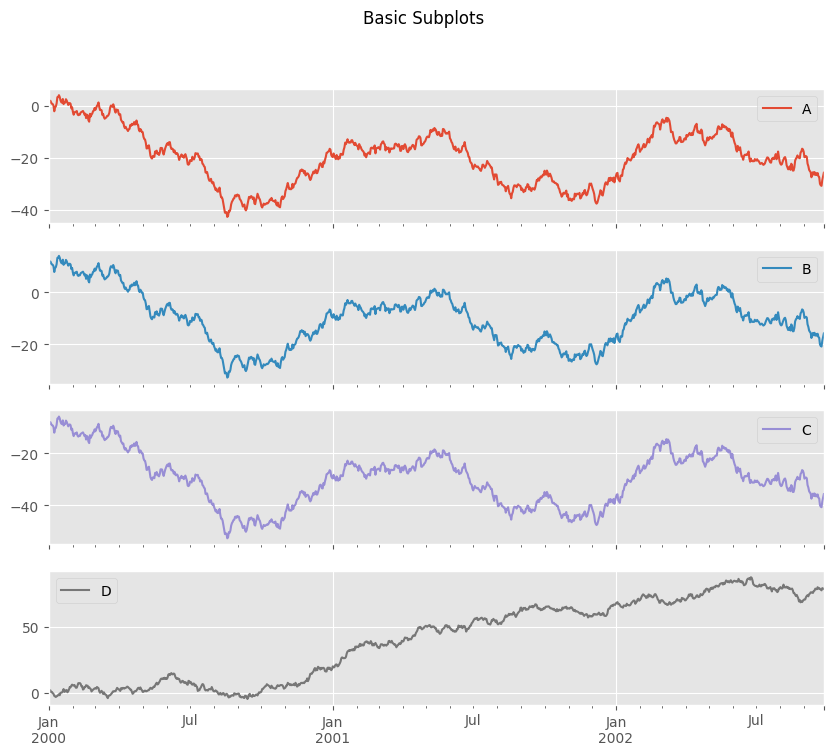

In [3]:
# Create subplots for each column
df.plot(subplots=True, figsize=(10, 8), title='Basic Subplots')

### 1.2 Customizing Subplot Layout

You can customize the layout of subplots using the `layout` parameter, which accepts a tuple of (rows, columns):

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

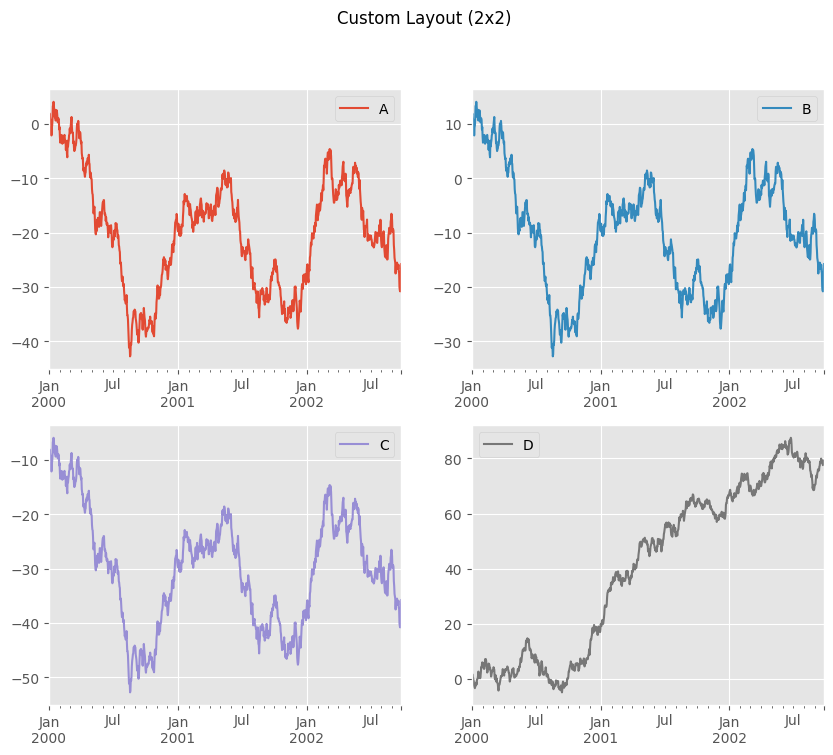

In [4]:
# Create subplots with a 2x2 layout
df.plot(subplots=True, layout=(2, 2), figsize=(10, 8), sharex=False, title='Custom Layout (2x2)')

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

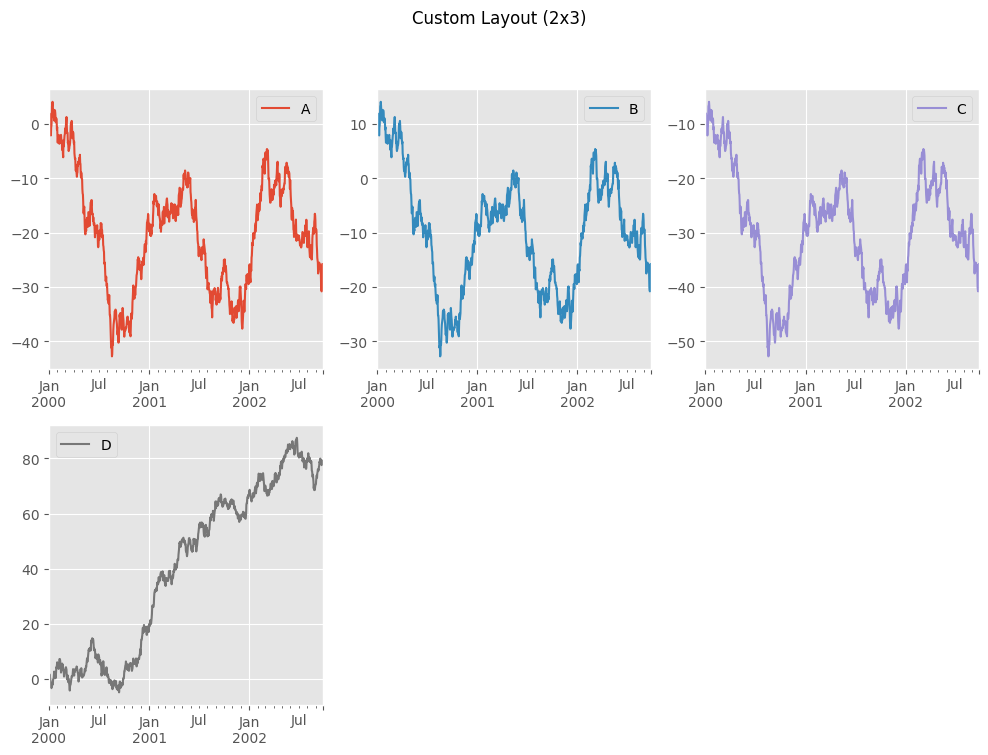

In [5]:
# Create subplots with a 2x3 layout (with empty subplots)
df.plot(subplots=True, layout=(2, 3), figsize=(12, 8), sharex=False, title='Custom Layout (2x3)')

You can use `-1` for one dimension to automatically calculate the number of rows or columns needed:

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

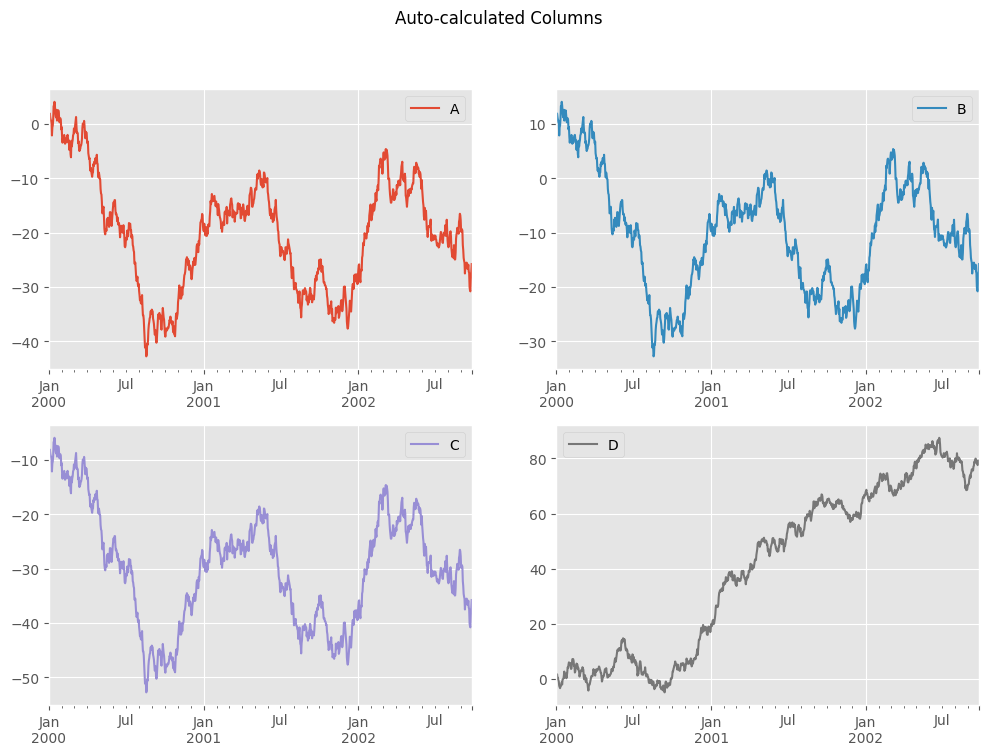

In [6]:
# Automatically calculate the number of columns
df.plot(subplots=True, layout=(2, -1), figsize=(12, 8), sharex=False, title='Auto-calculated Columns')

### 1.3 Using Custom Axes

You can pass multiple axes created beforehand as a list via the `ax` parameter. This allows for more complex layouts:

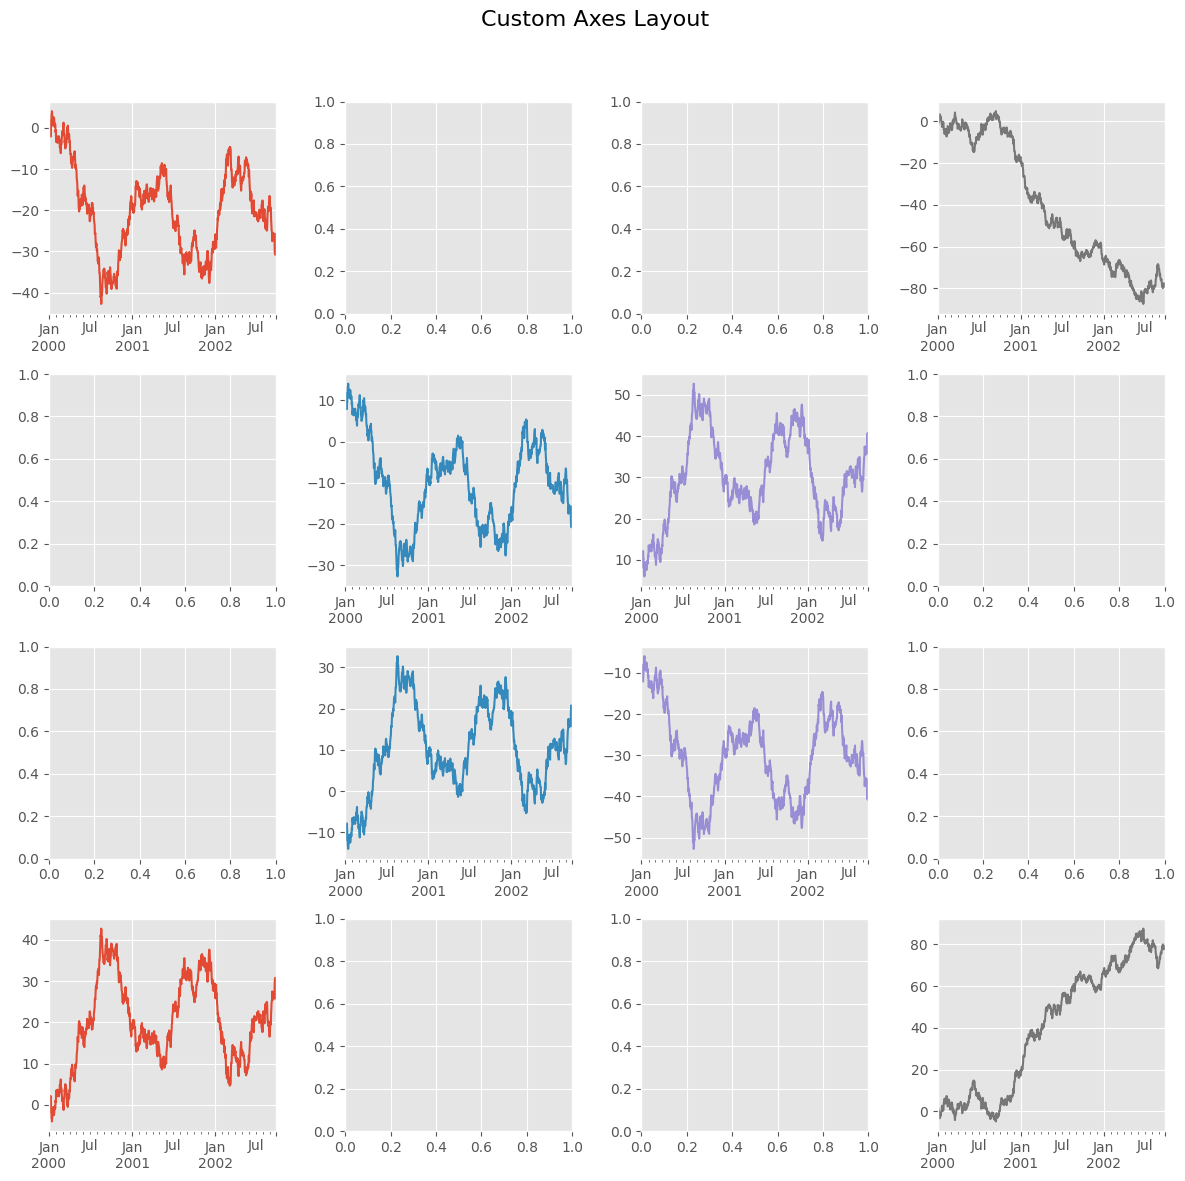

In [7]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Define target axes for the plots
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]  # Diagonal from top-left to bottom-right
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]  # Diagonal from bottom-left to top-right

# Plot on the first set of axes
df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False)

# Plot the negative values on the second set of axes
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False)

# Add a title to the figure
fig.suptitle('Custom Axes Layout', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title

### 1.4 Plotting on Specific Axes

You can also plot individual Series on specific axes:

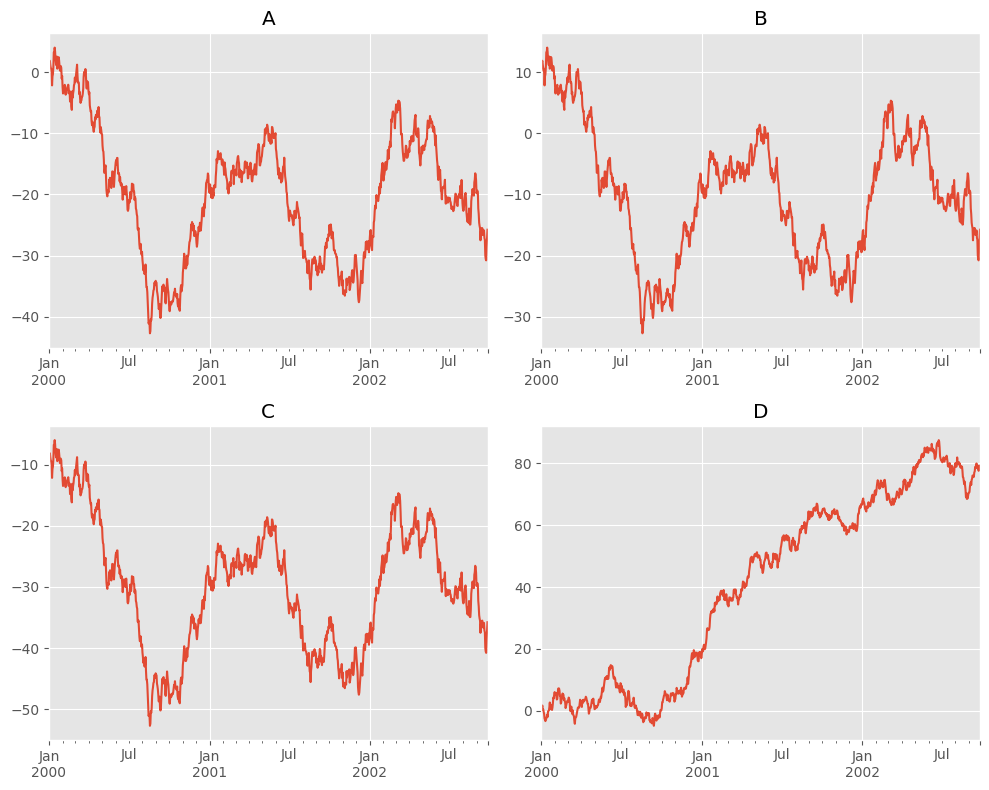

In [8]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot each column on a different axis
df['A'].plot(ax=axes[0, 0])
axes[0, 0].set_title('A')

df['B'].plot(ax=axes[0, 1])
axes[0, 1].set_title('B')

df['C'].plot(ax=axes[1, 0])
axes[1, 0].set_title('C')

df['D'].plot(ax=axes[1, 1])
axes[1, 1].set_title('D')

# Adjust layout
plt.tight_layout()

##### 2. Rolling Windows

Rolling windows are a powerful tool for time series analysis. They allow you to compute statistics over a sliding window of data points.

### 2.1 Creating Rolling Windows

In [9]:
# Create a Series for rolling window examples
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s = s.cumsum()

# Create a rolling window object
r = s.rolling(window=60)
print(f"Rolling window object: {r}")

Rolling window object: Rolling [window=60,center=False,axis=0,method=single]


### 2.2 Computing Rolling Statistics

Once you have a rolling window object, you can compute various statistics:

In [10]:
# Compute rolling mean
rolling_mean = r.mean()
print("First few values of rolling mean:")
print(rolling_mean.head())
print("\nLast few values of rolling mean:")
print(rolling_mean.tail())

First few values of rolling mean:
2000-01-01   NaN
2000-01-02   NaN
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
Freq: D, dtype: float64

Last few values of rolling mean:
2002-09-22    44.489241
2002-09-23    44.417437
2002-09-24    44.358266
2002-09-25    44.256658
2002-09-26    44.114907
Freq: D, dtype: float64


Let's visualize the original series and its rolling mean:

Text(0, 0.5, 'Value')

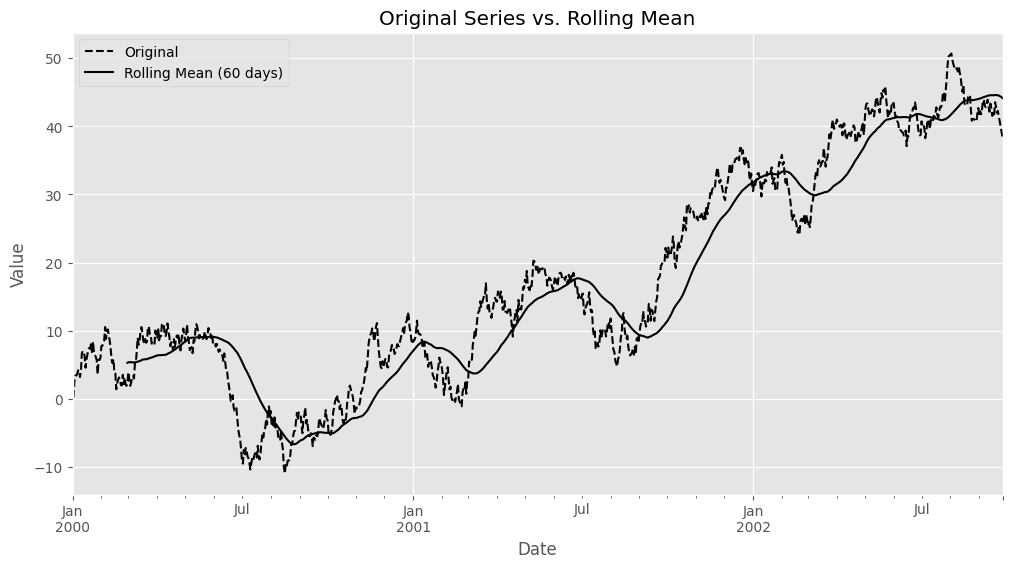

In [11]:
# Plot the original series and its rolling mean
plt.figure(figsize=(12, 6))
s.plot(style='k--', label='Original')
r.mean().plot(style='k', label='Rolling Mean (60 days)')
plt.legend()
plt.title('Original Series vs. Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Value')

### 2.3 Rolling Windows with DataFrames

Rolling windows can also be applied to DataFrames. This applies the rolling window operation to all columns:

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

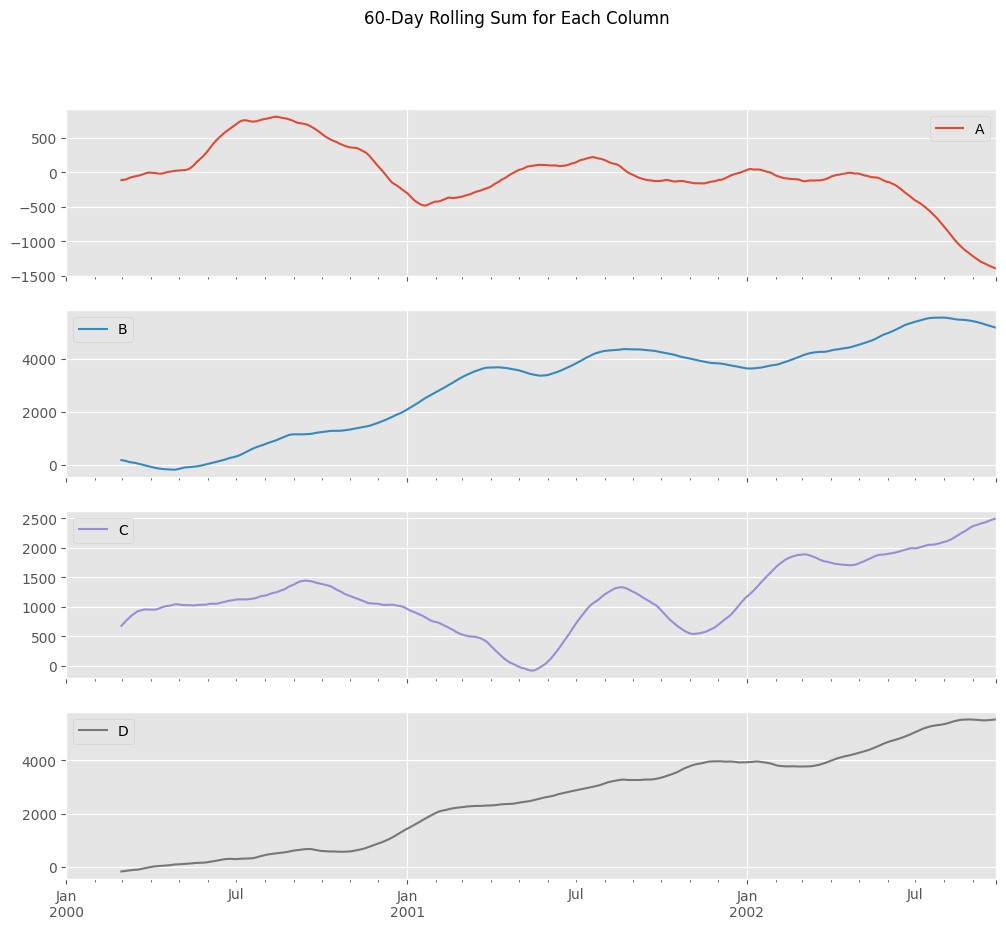

In [12]:
# Create a new DataFrame for rolling window examples
df_roll = pd.DataFrame(np.random.randn(1000, 4),
                      index=pd.date_range('1/1/2000', periods=1000),
                      columns=['A', 'B', 'C', 'D'])
df_roll = df_roll.cumsum()

# Compute rolling sum with a 60-day window and plot
df_roll.rolling(window=60).sum().plot(subplots=True, figsize=(12, 10), 
                                     title='60-Day Rolling Sum for Each Column')

### 2.4 Common Rolling Window Methods

Pandas provides a number of common statistical functions for rolling windows:

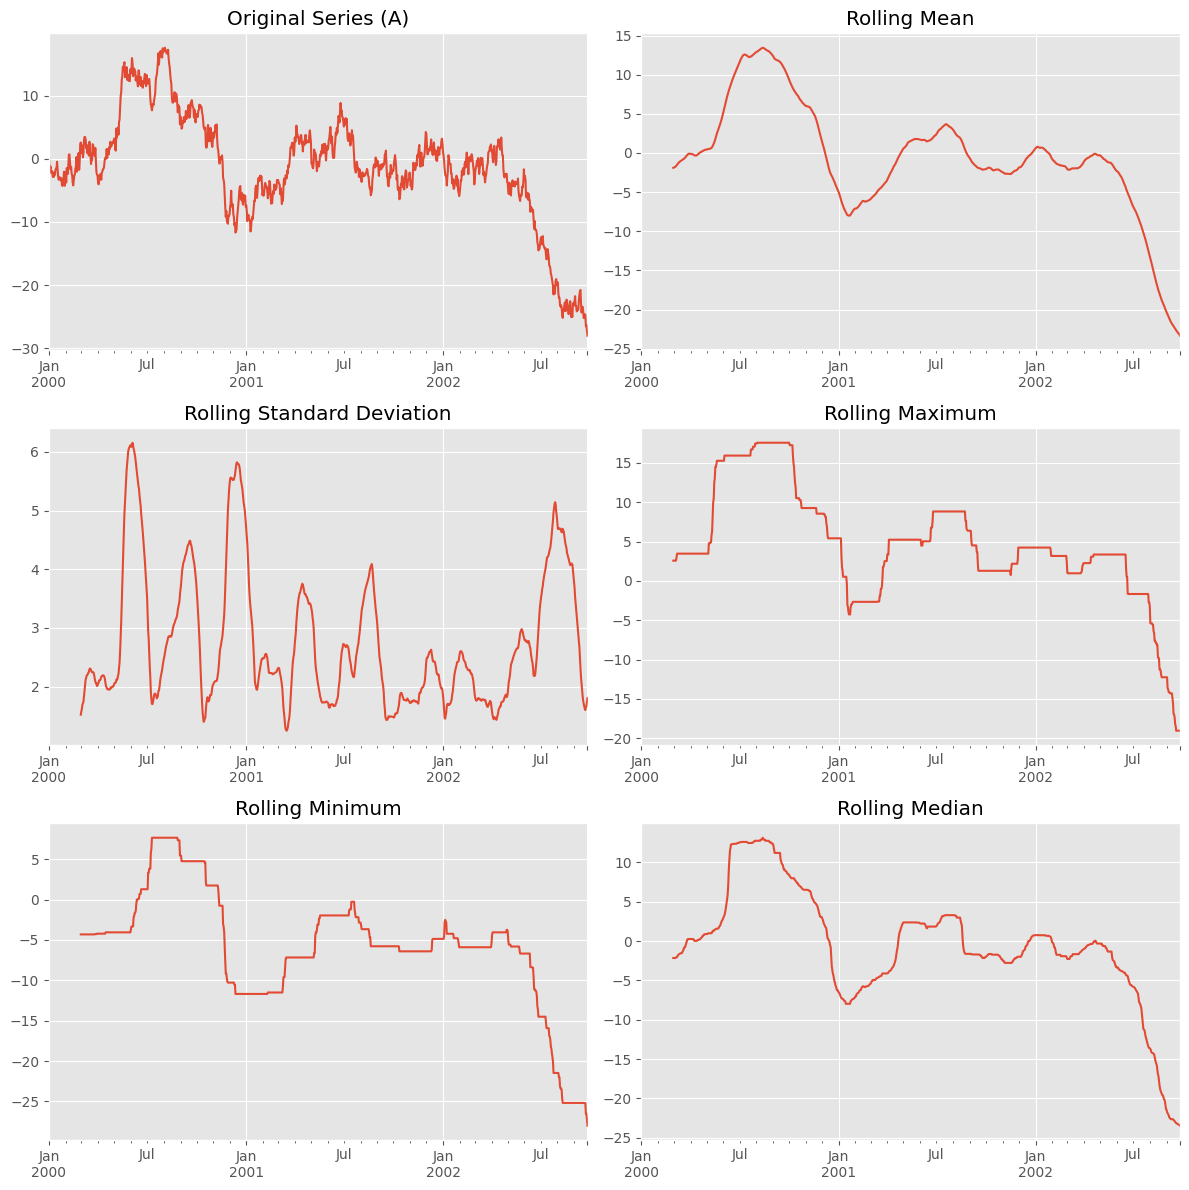

In [13]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot original data
df_roll['A'].plot(ax=axes[0, 0], title='Original Series (A)')

# Plot various rolling statistics
df_roll['A'].rolling(window=60).mean().plot(ax=axes[0, 1], title='Rolling Mean')
df_roll['A'].rolling(window=60).std().plot(ax=axes[1, 0], title='Rolling Standard Deviation')
df_roll['A'].rolling(window=60).max().plot(ax=axes[1, 1], title='Rolling Maximum')
df_roll['A'].rolling(window=60).min().plot(ax=axes[2, 0], title='Rolling Minimum')
df_roll['A'].rolling(window=60).median().plot(ax=axes[2, 1], title='Rolling Median')

plt.tight_layout()

### 2.5 Rolling Window Parameters

Rolling window functions accept several important parameters:

- `window`: Size of the moving window
- `min_periods`: Minimum number of observations required to have a value
- `center`: Whether to set the labels at the center of the window

Let's explore these parameters:

In [14]:
# Create a Series with some missing values
s_missing = pd.Series(np.random.randn(20))
s_missing[[5, 10, 15]] = np.nan  # Set some values to NaN
print("Series with missing values:")
print(s_missing)

Series with missing values:
0    -0.835002
1    -0.974600
2     0.772972
3    -1.188280
4     0.249266
5          NaN
6     1.532883
7     0.458519
8    -0.156936
9    -1.314036
10         NaN
11    2.055272
12    0.105890
13    1.638953
14   -0.063838
15         NaN
16    0.169959
17   -2.007256
18    2.109712
19    0.829803
dtype: float64


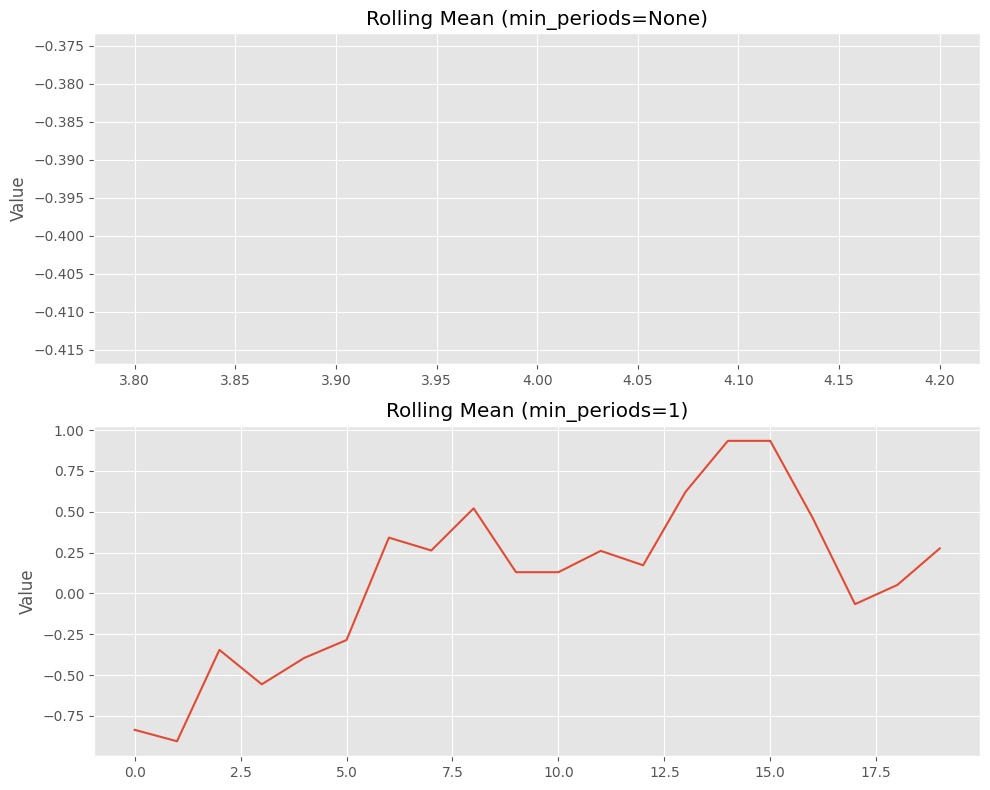

In [15]:
# Effect of min_periods
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Default min_periods (window size)
s_missing.rolling(window=5).mean().plot(ax=axes[0], title='Rolling Mean (min_periods=None)')
axes[0].set_ylabel('Value')

# Custom min_periods
s_missing.rolling(window=5, min_periods=1).mean().plot(ax=axes[1], title='Rolling Mean (min_periods=1)')
axes[1].set_ylabel('Value')

plt.tight_layout()

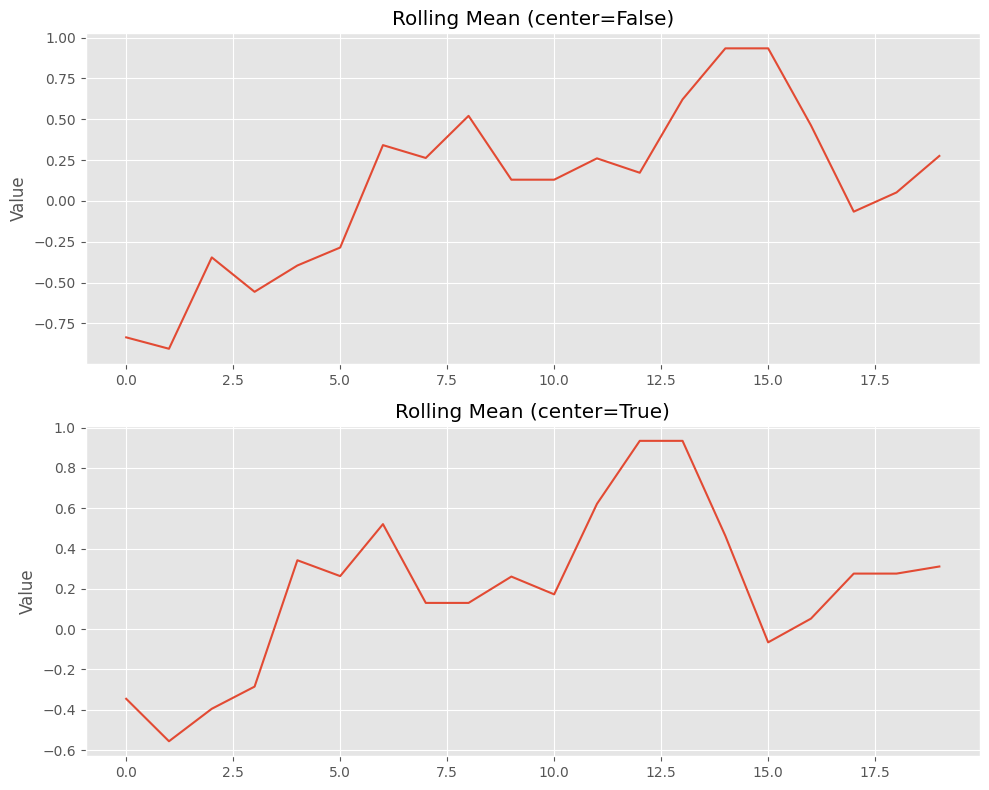

In [16]:
# Effect of center parameter
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Default center (False)
s_missing.rolling(window=5, min_periods=1).mean().plot(ax=axes[0], title='Rolling Mean (center=False)')
axes[0].set_ylabel('Value')

# Center=True
s_missing.rolling(window=5, min_periods=1, center=True).mean().plot(ax=axes[1], title='Rolling Mean (center=True)')
axes[1].set_ylabel('Value')

plt.tight_layout()

##### Summary

In this notebook, we've explored:

1. Creating and customizing subplots in pandas:
   - Basic subplots
   - Customizing subplot layouts
   - Using custom axes
   - Plotting on specific axes

2. Working with rolling windows for time series analysis:
   - Creating rolling window objects
   - Computing rolling statistics
   - Applying rolling windows to DataFrames
   - Common rolling window methods
   - Understanding rolling window parameters

These techniques are essential for effective data visualization and time series analysis in pandas.